In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([5.0, 5.517241379310345, 6.0344827586206895, 6.551724137931035, 7.068965517241379, 7.586206896551724, 8.10344827586207, 8.620689655172415, 9.137931034482758, 9.655172413793103, 10.172413793103448, 10.689655172413794, 11.206896551724139, 11.724137931034484, 12.24137931034483, 12.758620689655173, 13.275862068965518, 13.793103448275863, 14.310344827586208, 14.827586206896552, 15.344827586206897, 15.862068965517242, 16.379310344827587, 16.896551724137932, 17.413793103448278, 17.93103448275862, 18.448275862068968, 18.96551724137931, 19.48275862068966, 20.0])
target = np.array([-340.12269404215346, -329.01787151361475, -358.16684042907514, -332.95028679503736, -324.63021510488863, -329.7945109232118, -294.82048934639255, -275.9009300863824, -251.4951204389137, -215.7174588376817, -184.65961245299542, -122.97454176336284, -80.82359945621296, -47.38618451212564, 10.381297253305146, 53.59727476716993, 141.3176625895072, 208.96141945099308, 283.3292405142135, 376.9623352323276, 477.54895328259215, 536.8691420071617, 630.359537093258, 747.348967435155, 855.1483635777372, 968.1934546355378, 1067.263119036753, 1198.2448178444502, 1296.570184400269, 1441.8057924476789])

In [2]:
train_set = data[:20]
target_set = target[:20]
train_set.shape

(20,)

In [3]:
def step_gradient(a_prev, b_prev, c_prev, train, target, learning_rate):
    N = len(train)
    a_gradient = 0
    b_gradient = 0
    c_gradient = 0
    
    for i in range(0, N):
        x = train[i]
        y = target[i]
        a_gradient += -2 * pow(x,2) * (y - a*pow(x,2) - b*x - c) / N
        b_gradient += -2 * x * (y - a*pow(x,2) - b*x - c) / N
        c_gradient += (-2*y + 2*a*x**2 + 2*b*x + 2*c)/N
    a_new = a_prev - learning_rate * a_gradient
    b_new = b_prev - learning_rate * b_gradient
    c_new = c_prev - learning_rate * c_gradient
    return a_new, b_new, c_new

N = len(train_set)
a = 0
b = 0
c = 0
learning_rate = 0.00005


def mse(seq_a,seq_b):
    return ((seq_a - seq_b) ** 2).mean(axis=0)

round = 0
while True:
    round += 1
    a_new,b_new,c_new = step_gradient(a ,b, c, train_set, target_set, learning_rate)
    seq_a = np.array([a_new,b_new,c_new])
    seq_b = np.array([a,b,c])
    if abs(mse(seq_a,seq_b)) < 0.0001:
        a,b,c = a_new,b_new,c_new
        print('Stopped at:\n',a_new,b_new,c_new)
        break
    a,b,c = a_new,b_new,c_new

print("Took %s Round..."% round)


Stopped at:
 6.35727155943 -75.6745030105 -16.0417914731
Took 2284 Round...


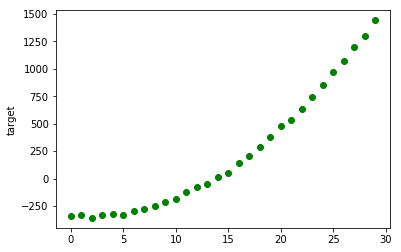

30


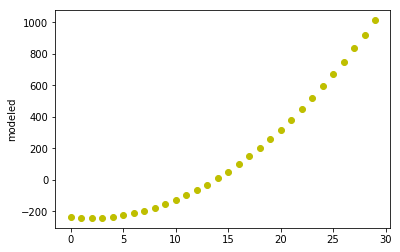

In [4]:
plt.plot(target,'go')
plt.ylabel('target')
plt.show()

N = len(data)
print(N)
#modeled = np.zeros(N)
modeled = np.zeros(30)
for i in range(0, N):
    x = data[i]
    modeled[i] = a*x**2 + b*x + c


plt.plot(modeled,'yo')
plt.ylabel('modeled')
plt.show()

